<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Introduction to NumPy and matplotlib

### Modules - Basics
<section class="post-meta">
By Jonas Tjemsland, Andreas Krogen, Håkon Ånes og Jon Andreas Støvneng
</section>
Last edited: March 11th 2018 
___


This notebook gives a brief introduction to NumPy and matplotlib. For a more detailed tutorial on NumPy, you can check out this [quickstart tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html) by SciPy or check out the [NumPy and SciPy documentations](http://docs.scipy.org/doc/). The review of matplotlib includes the pyplot.plot() function and amongst other a couple of tips and tricks about the figure appearances.

## 1 NumPy arrays (vectors)

*NumPy is the fundamental package for scientific computing with Python. It contains among other things:*  
+ *a powerful N-dimensional array object*
+ *sophisticated (broadcasting) functions*
+ *tools for integrating C/C++ and Fortran code*
+ *useful linear algebra, Fourier transform, and random number capabilities*    

*Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.* [1]

In this notebook we will discuss the numpy-array class (which we will use as vectors) and the advantages in using these instead of ordinary Python-array. As we shall see, this is a powerful tool in plotting.

Let us start by importing the NumPy-library.

In [1]:
import numpy as np

We can easily transform an ordinary python-array to a numpy-array using numpy.array(), which takes an array as input an returns the corresponding numpy-array. 

In [2]:
array = [0,1,2,3,4,5]
numpy_array = np.array(array)

The array elements in the NumPy array are of a type that corresponds to float type, but we can specify the type of the elements (e.g. int) if we want. The square brackets operator ``[]`` works in the same manner as ordinary python arrays. For example ``numpy_array[i:j:k]`` picks out the elements starting from index ``i`` to, but not including, ``j`` with a step size ``k`` (``k=1`` by default). ``numpy_array[::k]`` will pick out every ``k``th element. Moreover, ``n=numpy_array[i:j:k]`` will make ``n`` a (soft) copy of the ``i``th element in ``numpy_array``. For clarity, check out the following examples. 

In [3]:
print(numpy_array)
print(numpy_array[2:])
print(numpy_array[::2])
print(numpy_array[1:4:2])
print(numpy_array[0:5])

[0 1 2 3 4 5]
[2 3 4 5]
[0 2 4]
[1 3]
[0 1 2 3 4]


In [4]:
n = numpy_array[1:2]
n[0] = 100
print(numpy_array)

[  0 100   2   3   4   5]


If we multiply a scalar, $n$, with the ordinary array we get an array which consists of $n$ of the original arrays (example will follow). If we multiply the numpy-array with a scalar, each of the entries will be multiplied by the scalar.

In [5]:
n = 5
print(array*n)
print(numpy_array*n)

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]
[  0 500  10  15  20  25]


One advantage of these numpy-arrays is that we easily can perform mathematical operations on the whole array. For example, if we add (or subtract) a scalar to a numpy-array, the scalar will be added (or subtracted) element-wise. One can also add, subtract, multiply or divide two numpy-arrays of the same length, which is also done element-wise. If we try to do the same with an ordinary array, we get an error (except if we add them, in which case we will get one array consisting of the ones added). 

In [6]:
print(5 + numpy_array)
print(numpy_array + numpy_array)
print(numpy_array*numpy_array)
# The following gives errors:
#5 + array
#array - array
#array*array

[  5 105   7   8   9  10]
[  0 200   4   6   8  10]
[    0 10000     4     9    16    25]


We create empty numpy-arrays using ``numpy.zeros()`` or ``numpy.ones()``.

In [7]:
print(np.zeros(10))
print(np.ones(10))
print([0]*10)
print([1]*10)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In NumPy it is easy to create vectors with increasing entries with different step sizes, e.g. ``[0, 0.1, 0.2, 0.3]``, which may for example be used to set the values on an axis. To do this you can use ``numpy.arange()`` or ``numpy.linspace()``. 

The input values in ``numpy.arange()`` is start value, end value (excluded) and step value, while the input values in ``numpy.linspace()`` is start value, end value (included by default) and number of values (and the step value is atomatically calculated). We now create to code snippets you can play around with:

In [8]:
# arange([start,] stop[, step,], dtype=None)
#help(np.arange)
a = np.arange(0,10,1)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [9]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
#help(np.linspace)
b = np.linspace(0,10,10)
print(b)

[  0.           1.11111111   2.22222222   3.33333333   4.44444444
   5.55555556   6.66666667   7.77777778   8.88888889  10.        ]


NumPy includes several functions, such as trigonometric functions ($\sin(x)$, $\cos(x)$, etc.), hyperbolic functions ($\cosh(x)$, $\sinh(x)$, etc.), logarithms, exponentials and many more. The following code snippet shows some examples.

In [10]:
x = np.linspace(0,5,5,endpoint=False)
print('x =       ', x)
print('5x^2+4 =  ', 5*x**2+4)
print('cos(x) =  ', np.cos(x))
print('sin(x) =  ', np.sin(x))
print('tan(x) =  ', np.tan(x))
print('cosh(x) = ', np.cosh(x))
print('e^x =     ', np.exp(x))
print('log(x+1) =', np.log(x+1))

x =        [ 0.  1.  2.  3.  4.]
5x^2+4 =   [  4.   9.  24.  49.  84.]
cos(x) =   [ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362]
sin(x) =   [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
tan(x) =   [ 0.          1.55740772 -2.18503986 -0.14254654  1.15782128]
cosh(x) =  [  1.           1.54308063   3.76219569  10.067662    27.30823284]
e^x =      [  1.           2.71828183   7.3890561   20.08553692  54.59815003]
log(x+1) = [ 0.          0.69314718  1.09861229  1.38629436  1.60943791]


## 2 Function definitions

Function is a block of code that easily can be reused. This gives a slimmer and more readable code. We have already been using a lot of predefined functions, such as `print()`, `np.arange()`, `np.linspace()`, `np.cos()`, `np.tanh()`, and so forth. We will not discuss how we define our own functions detail nor how they work, but simply implement an example. For a more detailed discussion on functions, check out this [tutorial](http://www.tutorialspoint.com/python/python_functions.htm).

In [11]:
def function_name(first_parameter, second_parameter=2):
    """This is an example of a function. This text
    should explain what the function does, what
    it returns and what input parameters it takes.
    
    :first_parameter: explanation of first_parameter
    :second_parameter: explanation of second_parameter
    :returns: explanation of return value(s)
    """
    some_variable = first_parameter*second_parameter
    return some_variable

In [12]:
print(function_name(1))
print(function_name(1,5))
print(function_name(numpy_array,10))

2
5
[   0 1000   20   30   40   50]


## 3 Plotting using matplotlib's pyplot
*matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell, web application servers, and six graphical user interface toolkits.*

*matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code. For a sampling, see the screenshots, thumbnail gallery, and examples directory*

*For simple plotting the pyplot interface provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.* [2]

Matplotlib includes a number of functions with an unlimited number of plotting alternatives. The easiest way to learn to plot in Python is, accoring to the autors of this notebook, to look on examples. We start by importing matplotlib's pyplot.

In [13]:
import matplotlib.pyplot as plt
# The following line specifies that figures should be shown directly in the notebook.
%matplotlib inline

In this notebook, we are going to take a closer look at `plt.plot()` and a couple of plotting techniques (such as global plotting parameters). We are going to use NumPy-arrays, as discussed earlier. All of the following can, in principle, be achieved using ordinary Python arrays. If you are in search of other plotting functions check out [numfys](https://www.numfys.net/), [matplotlib's website](https://www.numfys.net/) or search the internet.

### 3.1 First plot - plotting of a function
As an example, let us plot the trigonometric functions $f(x)=a\cos(x)$ og $g(x)=b\sin(x)$ using functions. When a computer plots a function it needs to evaluate the function at discrete points. Then it can draw lines between these points. Thus, we also need to specify a number of discrete $x$-values, say 100 values from $-\pi$ to $\pi$.

In [14]:
def f(x): return np.cos(x)
def g(x): return np.sin(x)
x = np.linspace(-np.pi,np.pi,100) # The

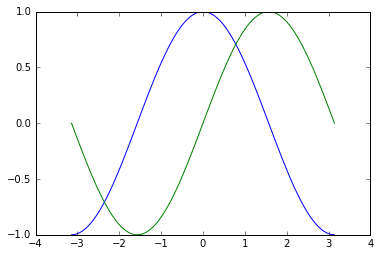

In [15]:
y1 = f(x)
y2 = g(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

### 3.2 Changing appearance and adding labels
The following code snippet adds some labels and changes some appearances. As stated earlier, there are a unlimited number of different plotting parameters!

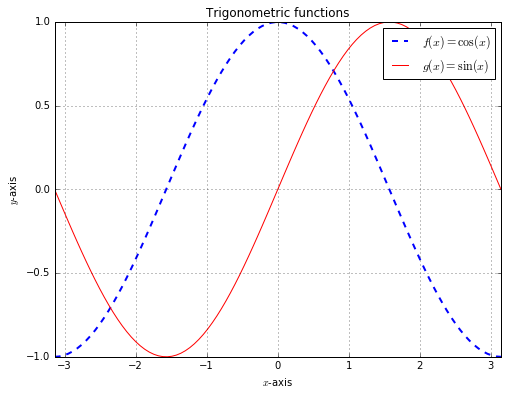

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(x,f(x),'b--',linewidth=2,label=r'$f(x)=\cos(x)$')
plt.plot(x,g(x),'r',label=r'$g(x)=\sin(x)$')
plt.title('Trigonometric functions')
plt.xlabel(r'$x$-axis')
plt.ylabel(r'$y$-axis')
plt.xlim([-np.pi,np.pi])
plt.legend()
plt.grid(True)
plt.show()

### 3.3 Subplots
We can easily create subplots (several plots in one figure) using `plt.subplot()`, which takes the number of rows, the number of columns and the plot number as input arguments. Within each subplot, we can plot as usual.

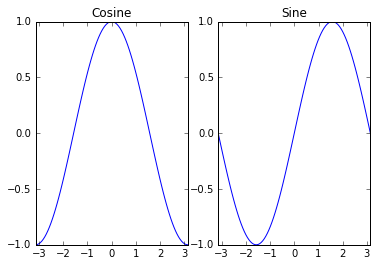

In [17]:
plt.figure()

plt.subplot(1,2,1)
plt.title('Cosine')
plt.plot(x,f(x))
plt.xlim([-np.pi,np.pi])

plt.subplot(1,2,2)
plt.title('Sine')
plt.plot(x,g(x))
plt.xlim([-np.pi,np.pi])
plt.show()

### 3.4 Scatter plots and linestyles
Scientists often conduct experiments where the result is a discrete number of data points. It is often necessary to plot the data as points in the plane. This is done using a scatter plot with `plt.plot()` or `plt.scatter()`. The latter is specifically created for scatter plots.

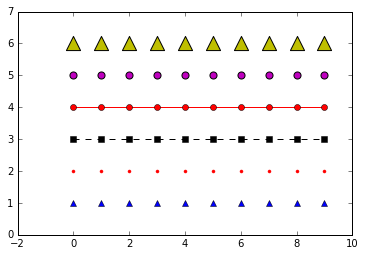

In [18]:
num = 10
x = np.linspace(0,10,num,endpoint=False)
plt.plot(x, [1]*num, '^b')
plt.plot(x, [2]*num, '.r')
plt.plot(x, [3]*num, '--sk')
plt.plot(x, [4]*num, '-ro')
plt.scatter(x, [5]*num, s=50, c='m', marker='o')
plt.scatter(x, [6]*num, s=200, c='y', marker='^')
plt.ylim(0,7)
plt.show()

### 3.5 Global plotting parameters
One way to change the appearance of plots is to use global plotting parameters. This way it is easy to get the plots exactly as you want with a slim code. The same result can be achieved if the parameters as specified to each plot, but this gives more code and the code has to be specified for each plot.

In the next code snippet, a set of global plotting parameters are set. Play with them! To find more alternatives, check out this text on [customizing matplotlib](http://matplotlib.org/users/customizing.html).

In [19]:
newparams = {'axes.labelsize': 15, 'axes.linewidth': 1,
             'axes.grid': True,'lines.linewidth': 1.5, 
             'figure.figsize': (8, 5),
             'ytick.labelsize': 15, 'xtick.labelsize': 15,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 15, 'legend.frameon': True, 
             'legend.handlelength': 1.5, 'axes.titlesize': 20,
             'mathtext.fontset': 'stix', 'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams)

Let us test these new settings!

In [20]:
def f(x): return np.cos(5*x)*np.exp(-x**2)
x = np.linspace(-np.pi,np.pi,100)

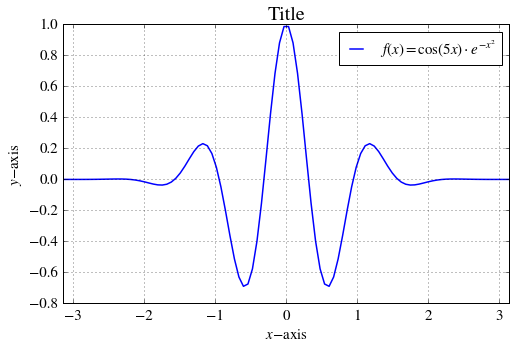

In [21]:
plt.figure()
plt.plot(x,f(x),label=r'$f(x)=\cos(5x)\cdot e^{-x^2}$')
plt.title('Title')
plt.xlabel(r'$x$-axis')
plt.ylabel(r'$y$-axis')
plt.xlim([-np.pi,np.pi])
plt.legend()
plt.show()

### 3.6 More 2D plotting functions
In this notebook we only discuss line plots and scatter plots. However, there a number of different plotting functions one can use! For example, `plt.contour()`, `plt.imshow()`, `plt.streamplot()` and `plt.arrow()` can be used to illustrate contours, surfaces, stream lines or [electric fields and potentials](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/electric_fields_potentials_from_point_charges.ipynb), `plt.hist()` and `plt.bar()` can be used to illustrate different statistical data, and `plt.boxplot()` can be used to visualise the errors in a scatter plot.

### 3.7 3D plots
If we specify that the figure should be a 3D-axis, we can simply use the same functions as earlier to create a 3D-line plot.

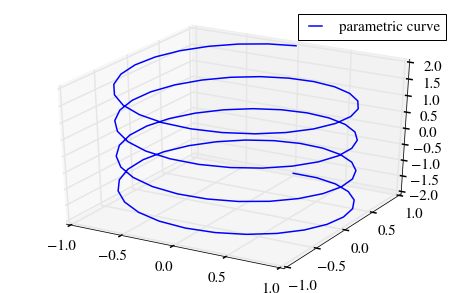

In [22]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams.update(newparams)

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z
x = np.sin(theta)
y = np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()
plt.show()

This also works for scatter plots. There are a number of different plotting functions to create 3D plots, such as surface plots, contour plots and wireframe plots. Check out [these examples](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#toolkit-mplot3d-tutorial)!

[1] http://www.numpy.org/  
[2] http://matplotlib.org/